In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


all_data = {}

# folder location with respect to the jupyter notebook'../data'
for dirname, _, filenames in os.walk('../data'):
    for filename in filenames:
        data = pd.read_excel(os.path.join(dirname, filename))
        all_data[filename] = data
# data connected to the exercise
gun_data = all_data["gun.xlsx"]
# data found on my own population of USA - census 2018
pop_data = all_data["pop2018.xlsx"]

In [2]:
# check if data was loaded
if not gun_data.empty:
    print(gun_data.columns)
else:
    raise RuntimeError("Could not load data")

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'latitude', 'longitude'],
      dtype='object')


In [3]:
# removing incident ID column, possible use for the future
# can be used to see time evolution of recorded incidents
gun_data= gun_data.drop(columns='incident_id')

In [4]:
#summing all incidents by state

sum_by_state = gun_data.groupby('state').sum()
sum_by_state.drop(columns=['longitude','latitude'])

,n_killed,n_injured
state,,
Alabama,1880,2998
Alaska,267,325
Arizona,1094,1096
Arkansas,773,1347
California,5562,7644
Colorado,796,1133
Connecticut,341,1258
Delaware,217,853
District of Columbia,459,1415


In [5]:
# the state with most murders is  California
sum_by_state.index[sum_by_state["n_killed"].argmax()]

'California'

In [6]:
# however the most dangerous one could be the one with the biggest amount of victims
sum_by_state['victims'] = sum_by_state['n_injured'] + sum_by_state['n_killed']

In [7]:
# that is why more needs to be added to shows which state is the most dangerous one
sum_by_state = sum_by_state.sort_values(by='n_killed',ascending= False)
print(sum_by_state)

                      n_killed  n_injured     latitude     longitude  victims
state                                                                        
California                5562       7644  577560.4412 -1.917836e+06    13206
Texas                     5046       6106  401450.6143 -1.266102e+06    11152
Florida                   3909       7072  412720.7553 -1.194203e+06    10981
Illinois                  3409      13514  699402.0119 -1.485748e+06    16923
Ohio                      2508       5703  398228.7880 -8.153237e+05     8211
Georgia                   2456       4056  288422.6982 -7.298494e+05     6512
Pennsylvania              2395       5056  345690.4937 -6.585184e+05     7451
North Carolina            2225       4629  300288.0009 -6.721887e+05     6854
Louisiana                 2179       4398  236494.5036 -7.057692e+05     6577
Missouri                  2136       3585  248467.5889 -5.916503e+05     5721
Alabama                   1880       2998  177234.0741 -4.665857

In [8]:
# data must be corrected by showing relation of murdered or victims to the population
# population dataframe imported at the beginning
pop_data

,state,population
0,Alabama,4887871
1,Alaska,737438
2,Arizona,7171646
3,Arkansas,3013825
4,California,39557045
5,Colorado,5695564
6,Connecticut,3572665
7,Delaware,967171
8,District of Columbia,702455
9,Florida,21299325


In [9]:
# summing both dataframes (gun violence and pop data)
new_data = pd.merge(sum_by_state, pop_data, on=['state', ])

# calculating murder rate by 100 000 people
new_data["murder_rate"] = new_data["n_killed"] * (100000 /new_data["population"])
# exporting to csv
# removing unnecessary columns for now
# new_data_export = new_data.set_index('state')
new_data_export = new_data.drop(columns=['n_injured', 'latitude', 'longitude', 'victims' ])
new_data_export.to_csv(".\\new_data.csv")
print(new_data_export.columns)
# most dangerous one could be district of columbia however very small population in comparison to the rest
# might give some error further investigation with population density is later
new_data = new_data.sort_values('murder_rate', ascending=False )
new_data

Index(['state', 'n_killed', 'population', 'murder_rate'], dtype='object')


,state,n_killed,n_injured,latitude,longitude,victims,population,murder_rate
32,District of Columbia,459,1415,120363.2791,-2.382821e+05,1874,702455,65.342264
8,Louisiana,2179,4398,236494.5036,-7.057692e+05,6577,4659978,46.759877
18,Mississippi,1176,1883,113192.9104,-3.132595e+05,3059,2986530,39.376802
10,Alabama,1880,2998,177234.0741,-4.665857e+05,4878,4887871,38.462554
38,Alaska,267,325,79704.3974,-1.921305e+05,592,737438,36.206434
9,Missouri,2136,3585,248467.5889,-5.916503e+05,5721,6126452,34.865204
14,South Carolina,1610,3084,228375.3725,-5.452748e+05,4694,5084127,31.667187
13,Maryland,1691,3167,221539.3815,-4.329611e+05,4858,6042718,27.984096
11,Tennessee,1824,4478,262569.4445,-6.437046e+05,6302,6770010,26.942353
3,Illinois,3409,13514,699402.0119,-1.485748e+06,16923,12741080,26.755974


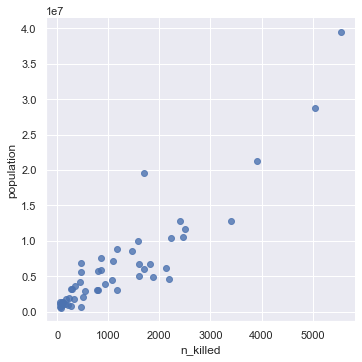

In [10]:
# as expected higher amount of murders in larger populations
%matplotlib inline

sns.set()
sns.lmplot(x='n_killed',y='population', data=new_data, fit_reg=False)

<AxesSubplot:xlabel='state', ylabel='murder_rate'>

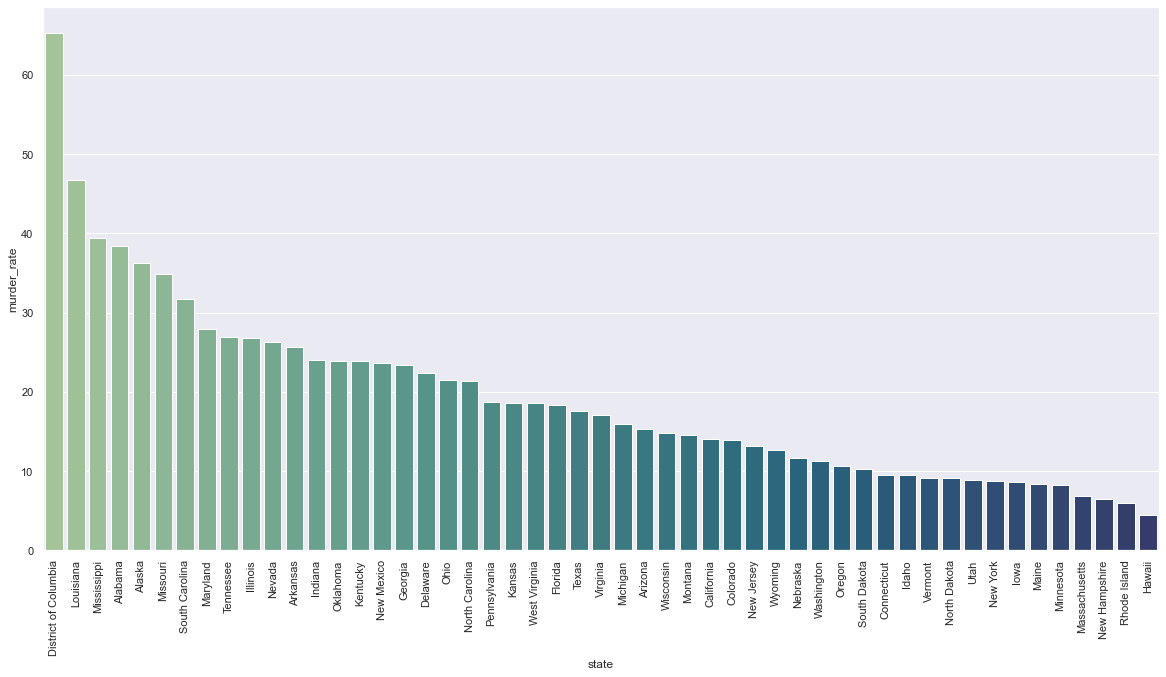

In [11]:
# plot of murder rate by state
# the most dangerous one is the District of Columbia
# however very small population of the DC in comparison to the Louisiana
# suggests that the Louisiana is the most dangerous state




plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='murder_rate',data=new_data, palette="crest")



matplotlib.axes._subplots.AxesSubplot

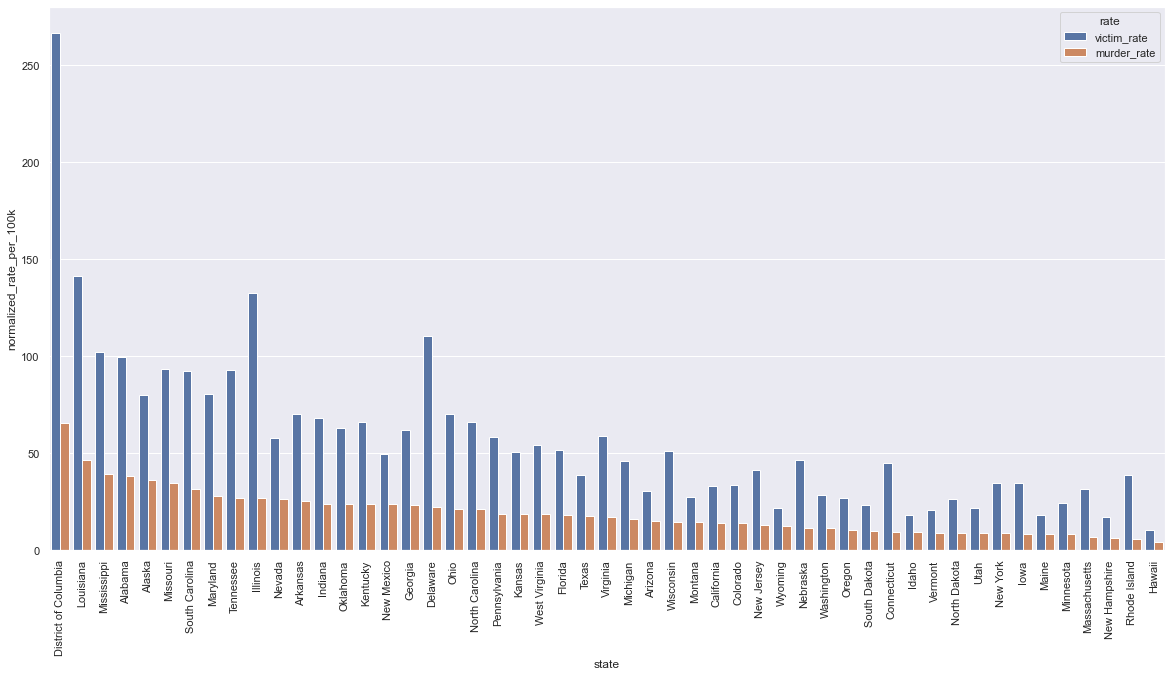

In [12]:
# by also checking the victim rate we can say that Illinois and Delaware are much more dangerous
# than they seem if looking only on the murder rates
#especially Illinois which moves up to the third position

new_data["victim_rate"] = new_data['victims'] *(100000/new_data["population"])
# new_data["victim_rate"] = new_data['victim_rate']/new_data["victim_rate"].max()
# new_data["murder_rate"] = new_data['murder_rate']/new_data["murder_rate"].max()

melted = pd.melt(new_data[['state','victim_rate', 'murder_rate']],
                 id_vars="state",
                 var_name="rate",
                 value_name="normalized_rate_per_100k")
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
type(sns.barplot(x='state', y='normalized_rate_per_100k', hue='rate', data=melted))

In [13]:
# kernel density approximation for the accidents as longitude and latitude
# sns.kdeplot(y="latitude",
#             x="longitude",
#             data=gun_data[(gun_data.longitude<-60) & (gun_data.longitude>-130)],
#             cmap="viridis",
#             fill=True,
#             legend=True)

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

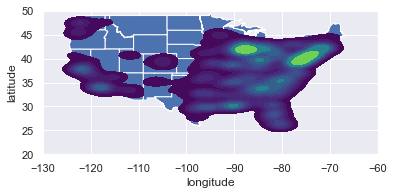

In [14]:
import geopandas
from descartes import PolygonPatch

states = geopandas.read_file('../models/cb_2018_us_state_500k.shp')
print(states.columns)

ax = states.plot()
ax.set_xlim(-130,-60)
ax.set_ylim(20,50)
#it takes too long maybe im doing sth wrong
sns.kdeplot(y="latitude",
            x="longitude",
            data=gun_data[(gun_data.longitude<-60) & (gun_data.longitude>-130)],
            cmap="viridis",
            fill=True,
            legend=True,
            ax=ax)